# Expectation - Maximization Clustering - Life Cycle Savings
### Liam Caulfield
##### May 15, 2023

I we will be addressing two prompts:
1. **In the realm of unsupervised learning/clustering, explain when to prioritize using EM over K-means.**
2. **Using the life-cycle savings hypothesis dataset, fulfill two requirements: 1) Use EM for clustering similiar countries. 2) By leveraging AIC and BIC, report how many groups were produced with EM clustering techniques.**

***Sources:***
1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4433949/#:~:text=EM%20and%20K%2Dmeans%20are,and%20EM%20uses%20statistical%20methods.
2. https://www.youtube.com/watch?v=XLKoTqGao7U
3. https://machinelearningmastery.com/expectation-maximization-em-algorithm/

##### Prompt 1  

K-means and EM are both exceptional algorithms to lean on when leveraging the power of unspervised learning. EM and K-means are similiar regarding how they refine modelling through an iterative process. The biggest difference between the two is the use of calulcation to determine clustering: K-means using Euclidean distance and EM using statistical methods. EM provides a more flexible approach for creating assumptions about data distribution, which leads to a myriad of benefits. It  can accomdate clusters with different shapes, sizes and variances, including (but not limited to): overlapping clusters and missing data. Overall, EM is the preferred approach when the data exhibits probabilistic nature or when there is the potential that data points will belong to multiple clusters at once. This manifests in soft assignments of data points to clusters, while k-means provides hard assignments for these data points. EM provides strength when the modeling approach is more probabilisitc and when capturing more complex patterns or overlapping clusters. 

##### Prompt 2 - Life-cycle savings dataset clustering

In [182]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [183]:
df = pd.read_csv('Assignment 7.csv', usecols=range(1, 6))
df_with_countries = pd.read_csv('Assignment 7.csv', usecols=range(0,6))

In [184]:
#df.isnull().sum()

In [185]:
num_clusters = 8

In [186]:
gmm = GaussianMixture(n_components = num_clusters, random_state=0)
gmm.fit(df)

GaussianMixture(n_components=8, random_state=0)

In [187]:
cluster_assignments = gmm.predict(df)

In [188]:
aic = gmm.aic(df)
bic = gmm.bic(df)

In [189]:
print("Cluster Assignments:")
for i, assignment in enumerate(cluster_assignments):
    country = df_with_countries.iloc[i, 0]
    print(f"{country}: Cluster {assignment+1}")

Cluster Assignments:
Australia: Cluster 3
Austria: Cluster 5
Belgium: Cluster 3
Bolivia: Cluster 4
Brazil: Cluster 1
Canada: Cluster 2
Chile: Cluster 1
China: Cluster 4
Colombia: Cluster 4
Costa Rica: Cluster 4
Denmark: Cluster 7
Ecuador: Cluster 4
Finland: Cluster 8
France: Cluster 3
Germany: Cluster 7
Greece: Cluster 1
Guatamala: Cluster 4
Honduras: Cluster 4
Iceland: Cluster 8
India: Cluster 4
Ireland: Cluster 5
Italy: Cluster 5
Japan: Cluster 5
Korea: Cluster 4
Luxembourg: Cluster 7
Malta: Cluster 1
Norway: Cluster 3
Netherlands: Cluster 8
New Zealand: Cluster 5
Nicaragua: Cluster 4
Panama: Cluster 1
Paraguay: Cluster 4
Peru: Cluster 4
Philippines: Cluster 4
Portugal: Cluster 1
South Africa: Cluster 1
South Rhodesia: Cluster 4
Spain: Cluster 1
Sweden: Cluster 2
Switzerland: Cluster 7
Turkey: Cluster 4
Tunisia: Cluster 4
United Kingdom: Cluster 8
United States: Cluster 6
Venezuela: Cluster 1
Zambia: Cluster 4
Jamaica: Cluster 4
Uruguay: Cluster 1
Libya: Cluster 4
Malaysia: Cluster 4

In [190]:
print("AIC:", aic)
print("BIC:", bic)

AIC: 1228.6124986054351
BIC: 1547.9203405119354


**Num of clusters**:
1. 3 -> AIC: 1613.9164553410835, BIC: 1732.4618816776285
2. 4 -> AIC: 1618.4198065491394, BIC: 1777.1177159996755
3. 10 -> AIC: 1128.1477875191795, BIC: 1527.760595653662
4. 8 -> AIC: 1228.6124986054351, BIC: 1547.9203405119354
5. 12 -> AIC: 938.3796520832611, BIC: 1418.2974264457257

In [191]:
silhouette_avg = silhouette_score(df, cluster_assignments)
sample_silhouette_values = silhouette_samples(df, cluster_assignments)
print(silhouette_avg)

0.6364987348566787


**Silhouette Average Score:**
1. 3 -> .6739598072436485
2. 4 -> .5488238431561367
3. 10 -> .5467843403426791
4. 8 -> .6364987348566787
5. 12 -> .5419766451298265

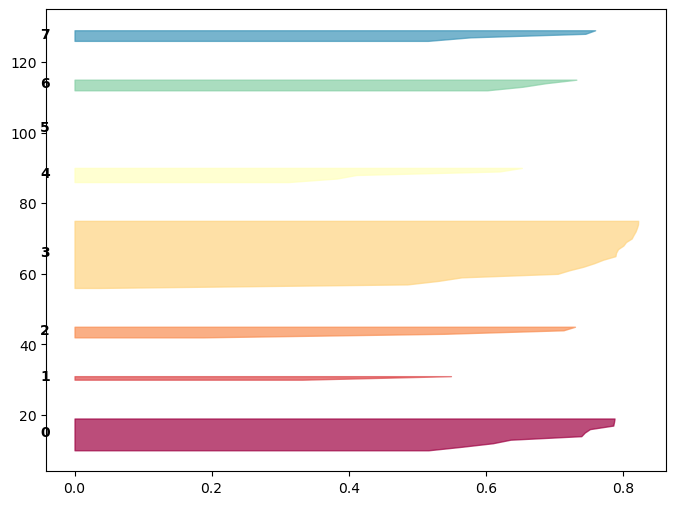

In [192]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

y_lower = 10
for i in range(num_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_assignments == i]
    ith_cluster_silhouette_values.sort()

    # Compute the size of the current cluster
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Fill the silhouette plot with the corresponding silhouette values
    color = plt.cm.get_cmap("Spectral")(i / num_clusters)
    ax.fill_betweenx(
        y=np.arange(y_lower, y_upper),
        x1=0,
        x2=ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(
        -0.05,
        y_lower + 0.5 * size_cluster_i,
        str(i),
        color="black",
        fontweight="bold",
        verticalalignment="center",
    )

    # Update the lower bound for the next plot
    y_lower = y_upper + 10

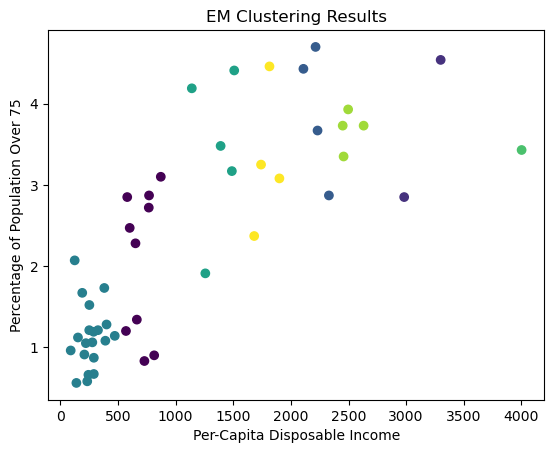

In [193]:
plt.scatter(df_with_countries['dpi'], df_with_countries['pop75'], c=cluster_assignments)
plt.xlabel('Per-Capita Disposable Income')
plt.ylabel('Percentage of Population Over 75')
plt.title('EM Clustering Results')
plt.show()

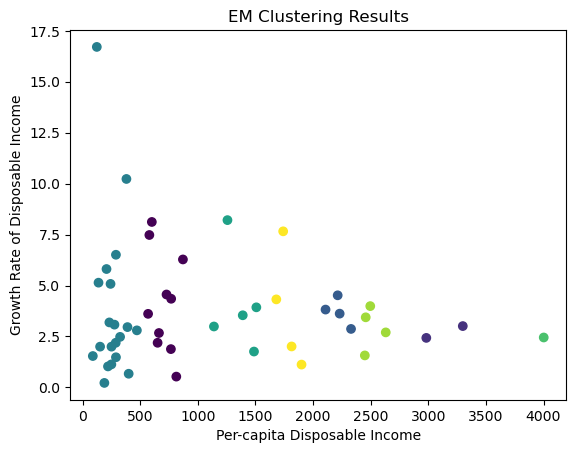

In [194]:
plt.scatter(df_with_countries['dpi'], df_with_countries['ddpi'], c=cluster_assignments)
plt.xlabel('Per-capita Disposable Income')
plt.ylabel('Growth Rate of Disposable Income')
plt.title('EM Clustering Results')
plt.show()

##### Findings Summary
Due to the uniform nature of scale for our data, we de not see it necessary to normalize our variables. 

We started with 3 clusters and explored the efficiency and fit of the model from that number of clusters ranging to 12. As we continued to increase the number of clusters we found that overfitting became in issue quickly, especially when considering the small sample size of 50 countries. To best analyze the fit of our model, we calculated AIC, BIC, and silhouette averages for ever clustering. Since AIC and BIC are best leveraged as a comparison to other manifestations of the same model, we were not looking for a specific 'minimum' target value. We found that 8 clusters of countries (each country listed with the corresponding cluster is found in the report) generated the best combination of AIC, BIC, and silhoette average scores, which are also listed in the report above. 8 clusters generated a silhouette score of .636, the second highest among our modelling. However, the first highest was 3 clusters, which also had the highest AIC and BIC. The reason we did not choose 10 or 12 clusters, the lowest scores of our modelling, is because we began to see overfitting become a problem. This was not only found in the silhouette scores, but also in the visualizations above. 8 groups of countries led to the best combination of visualized clustering, AIC/BIC scores, and silhouette scores. 